<a href="https://colab.research.google.com/github/wi3jmu/DSS/blob/main/tutorial_notebooks/00_PuLP_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class='bar_title'></div>

*Decision Support Systems*

# Linear Programming

Toni Greif, Nico Elbert<br>
Chair of Information Systems and Business Analytics

Please, make sure you are signed in with your Google account and you created a copy of the notebook (preferentially in Google Drive). Otherwise, you can not save your edited notebooks.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Linear-Programming-with-Python-and-PuLP" data-toc-modified-id="Linear-Programming-with-Python-and-PuLP-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Linear Programming with Python and PuLP</a></span><ul class="toc-item"><li><span><a href="#Python-syntax" data-toc-modified-id="Python-syntax-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Python syntax</a></span><ul class="toc-item"><li><span><a href="#Indentation" data-toc-modified-id="Indentation-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Indentation</a></span></li><li><span><a href="#Variables" data-toc-modified-id="Variables-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Variables</a></span></li><li><span><a href="#Comments" data-toc-modified-id="Comments-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Comments</a></span></li><li><span><a href="#Lists" data-toc-modified-id="Lists-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Lists</a></span></li><li><span><a href="#Dictionaries" data-toc-modified-id="Dictionaries-1.1.5"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>Dictionaries</a></span></li></ul></li><li><span><a href="#PuLP-syntax" data-toc-modified-id="PuLP-syntax-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>PuLP syntax</a></span></li></ul></li></ul></div>

Don't forget, each session the PuLP package must be installed (not necessary if you don't use the Colab enviroment) and imported.

In [1]:
!pip install pulp
from pulp import *
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.2 MB 5.1 MB/s 


## Linear Programming with Python and PuLP

Linear Programming involves maximising or minimising a linear objective function, subject to a set of linear inequality or equality constraints.

Based on our example from the last tutorial, we will explain the Python and PuLP syntax in more detail.

### Python syntax

#### Indentation

Indentation refers to the spaces at the beginning of a code line. In Python is very important. Python uses indentation to indicate a block of code.

Example:

In [2]:
if 5 > 2:
    print("Five is greater than two!")

Five is greater than two!


#### Variables

In Python variables are created the moment you assign a value to it.

Example:

In [3]:
x = 5
print(x)

5


In [4]:
y = "Hello, World!"
print(y)

Hello, World!


#### Comments
In-code comments start with a #, and Python will render the rest of the line as a comment:

Example:

In [5]:
#This is a comment.
print("Hello, World!")

Hello, World!


#### Lists

Lists are containers that hold a number of other objects, in a given order.
To create a list, put a number of expressions in square brackets:

``L = [expression, ...]``
    
The expressions can be anything; you can put all kinds of objects in lists, including other lists.

Example:

In [6]:
firstList = ['red', 'blue', 0, 1]
print(firstList)

['red', 'blue', 0, 1]


The for-in statement makes it easy to loop over the items in a list:

In [7]:
for item in firstList:
    print(item)

red
blue
0
1


**Accessing Lists**

``len(L)`` returns the number of items in the list, ``L[i]`` returns the item at index i (the first item has index 0), and ``L[i:j]`` returns a new list, containing the objects between i and j.

**List comprehensions**

Python also supports computed lists, called “list comprehensions”. In its simplest form, a list comprehension has the following syntax:

``L = [expression(variable) for variable in sequence]``

where the expression is evaluated once, for every item in the sequence.

Example:

In [8]:
secondList = [variable**2 for variable in range(10)]
print(secondList)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


#### Dictionaries

Dictionaries written with curly brackets are collections which are unordered, changeable and indexed. 

In [ ]:
thisdict = {"brand": "Ford",
            "model": "Mustang",
            "year": 1964
           }
print(thisdict)

You can access the items of a dictionary by referring to its key name, inside square brackets:

In [ ]:
x = thisdict["model"]
print(x)

A dictionary can also contain many dictionaries, this is called nested dictionaries.

In [10]:
portion = {'Milk': {'A': 1, 'B': 2},
           'Choco': {'A': 3,'B': 2}
          }
print(portion)

{'Milk': {'A': 1, 'B': 2}, 'Choco': {'A': 3, 'B': 2}}


### PuLP syntax

####Chocolate Manufacturing####

We want to approach a simple optimization problem for the production amounts of two products A and B.

Decison Variables: 
* Amount of Product A: $x_a$
* Amount of Product B: $x_b$

Availabilities:
* $max\_ingredients_{Milk}$ = 20
* $max\_ingredients_{Choco}$ = 40

Revenue:
$$9*x_A + 14*x_B$$


Amount of Milk: 
$$1*x_A + 2*x_B$$

Amount of Choco:
$$3*x_A + 2*x_B$$

Costs for Milk:
$$0.1*1*x_A + 0.1*2*x_B$$
Costs for Choco:
$$0.3*3*x_A + 0.3*2*x_B $$

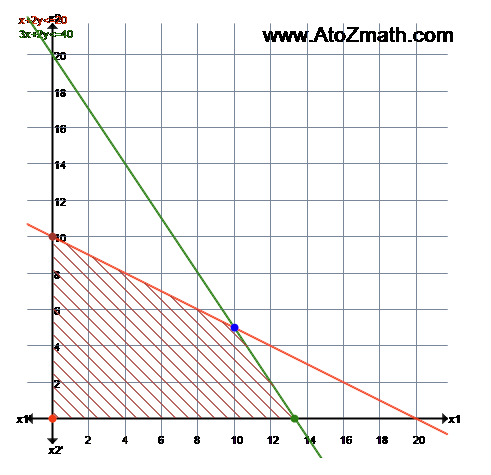

We want to maximize profit, which is made up of revenue minus costs. In the following, the problem is presented in general terms for any number of products and ingredients.

$$\max \sum_{p\ \in\ products} prices_p * quantity_p - \sum_{i\ \in\ ingredients}\sum_{p\ \in\ products}
costs_i * portion_{i,p} * quantity_p $$
subject to:
$$\sum_{p\ \in\ products} portion_{i,p} * quantity_p\leq max\_ingredients_i\quad \forall i\ \in\ ingredients$$
$$quantity_p \geq 0\quad  \forall p\in\ products$$



####Implementation in PuLP

Step 1: Create the Linear programming problem ``LpProblem()`` as maximization ``LpMaximize``.

In [11]:
m = LpProblem("chocolate maufacturing", LpMaximize)

/usr/local/lib/python3.7/dist-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Step 2: Set the lists for the index sets (here $products\ p$ and $ingredients\ i$) and the dictionaries for the parameters (here $prices, costs, portion, max\_ingredients$)

In [12]:
# Index sets
products = ['A', 'B']
ingredients = ['Milk', 'Choco']

In [13]:
# Parameters
costs = {'Milk': 0.1, 
         'Choco': 0.3}

prices = {'A': 9,
          'B': 14}

portion = {'Milk': {'A': 1, 'B': 2},
           'Choco': {'A': 3,'B': 2}}

max_ingredients = {'Milk': 20, 
                   'Choco': 40}

Step 3: Create the continuous decision variables ``LpVariable.dicts()`` for the corresponding indexes (here $products$). Set  ``lowBound=0`` to include the second part of the constraints here.

In [14]:
# Variables
quantity = LpVariable.dicts("quantity", products, lowBound=0, cat='Continuous')

Sometimes you don't need lists for the indexes and you can directly use the keys of the dictionaries.

In [15]:
for p in products:
    print(p)

A
B


In [16]:
for p in prices.keys():
    print(p)

A
B


Step 4: Add the objective ``lpSum()`` to your model ``m``. Note that two lists in python can only be added ``list1 + list2`` and not subtracted, so we have to add the minus sign to the costs.

In [17]:
# Objective 
m += lpSum([prices[p] * quantity[p] for p in products] #this is the revenue
           +[-costs[i] * portion[i][p] * quantity[p] for i in ingredients for p in products]) #these are the costs

Summations $\sum_{item\ \in\ list}x_p$ have become calls to
``
lpSum([x[item] for item in list]).
``

Step 5: Set the constraints (note, we already respect the second part of the constraints in our variables).

In [18]:
# Constraints
for i in ingredients:
    m += lpSum(portion[i][p] * quantity[p] for p in products) <= max_ingredients[i]

The quantifiers (here $\forall i \in ingredients$) become `` for...in loops`` and summations have become calls to ``lpSum()``.

As you can see, the impementiation is quite similar to the mathematical notation. 

$$\max \sum_{p\ \in\ products} prices_p * quantity_p - \sum_{i\ \in\ ingredients}\sum_{p\ \in\ products}
costs_i * portion_{i,p} * quantity_p $$
subject to:
$$\sum_{p\ \in\ products} portion_{i,p} * quantity_p\leq max\_ingredients_i\quad \forall i\in ingredients$$
$$quantity_p \geq 0\quad  \forall p\in products$$



In [19]:
m

chocolate_maufacturing:
MAXIMIZE
8.0*quantity_A + 13.200000000000001*quantity_B + 0.0
SUBJECT TO
_C1: quantity_A + 2 quantity_B <= 20

_C2: 3 quantity_A + 2 quantity_B <= 40

VARIABLES
quantity_A Continuous
quantity_B Continuous

Step 6: Solve the model ``m.solve()`` and check the optimality ``LpStatus[m.status]``.

In [20]:
# Solve
m.solve()
LpStatus[m.status]

'Optimal'

Step 7: Print the solution. ``m.variables()`` is the variable list of our model ``m``. With ``.name`` we get their variable names and with ``.varValue`` the values.

In [21]:
for var in m.variables():
    print ("{} = {}".format(var.name, var.varValue))

quantity_A = 10.0
quantity_B = 5.0


``.value`` evaluates the objective function for the solution.

In [22]:
print (value(m.objective))

146.0
